Week 7:

Implement mini batch optimization technique to improve the performance of deep 
learning model. 

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
import matplotlib.pyplot as plt

# ---------------------------
# Build Model
# ---------------------------
model = Sequential([
    Dense(16, activation='relu', input_shape=(30,)),# hidden layer
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')                     # output layer
])

# Compile Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\Sujit\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# [A] Load and preprocess real data
df = pd.read_csv("./datasets/week3_data.csv")  # Kaggle breast cancer dataset
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)  # Map malignant to 1, benign to 0

X = df.drop(columns=["diagnosis"]).values
y = df['diagnosis'].values.reshape(-1,1)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9906 - loss: 0.0362 - val_accuracy: 0.9825 - val_loss: 0.0630
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9839 - loss: 0.0472 - val_accuracy: 0.9825 - val_loss: 0.0615
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9913 - loss: 0.0338 - val_accuracy: 0.9825 - val_loss: 0.0610
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9832 - loss: 0.0384 - val_accuracy: 0.9825 - val_loss: 0.0564
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9802 - loss: 0.0521 - val_accuracy: 0.9825 - val_loss: 0.0502
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9891 - loss: 0.0304 - val_accuracy: 0.9912 - val_loss: 0.0492
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9884 - loss: 0.0331 - val_accuracy: 0.9825 - val_loss: 0.0559
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9893 - loss: 0.0397 - val_accuracy: 0.9825 - val_

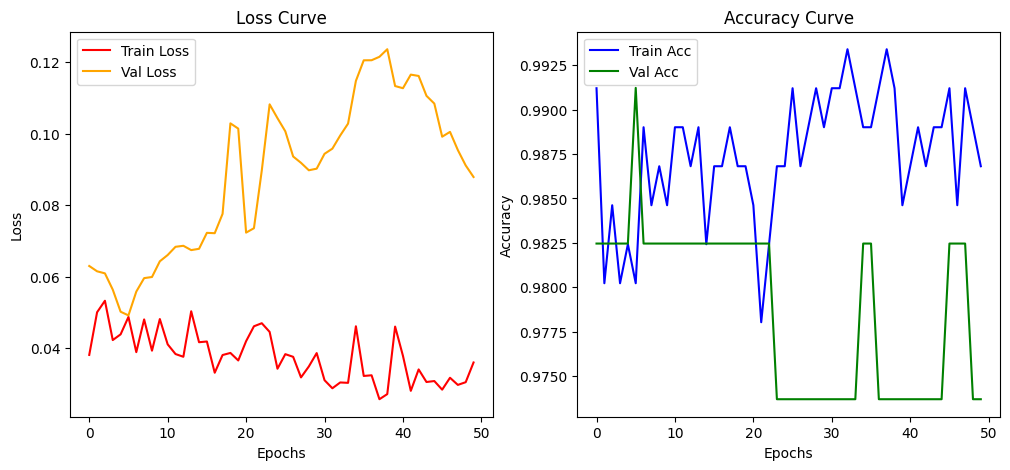

In [8]:
# ---------------------------
# Train Model with Mini-Batch Gradient Descent
# ---------------------------
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,   # mini-batch size
    validation_data=(X_test, y_test),
    verbose=1
)

# ---------------------------
# Plot Loss and Accuracy
# ---------------------------
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss', color='red')
plt.plot(history.history['val_loss'], label='Val Loss', color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc', color='blue')
plt.plot(history.history['val_accuracy'], label='Val Acc', color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()